In [1]:
import itertools, os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.ascii as at
from astropy import table
from scipy.interpolate import interp1d

In [2]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

std_ms = 9
std_mew = 1.5

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = talk_figure
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [195]:
model_dir = os.path.expanduser("~/Dropbox/Models/")
cat_dir = os.path.expanduser("~/Dropbox/data/catalogs/")

# plot_dir = os.path.expanduser("~/Dropbox/talks/hypra figs/")
# os.path.exists(plot_dir)

# Set up necessary conversions to stellar mass

In [5]:
kh = at.read(os.path.join(model_dir,"kraushillenbrand5.dat"))
print(kh.dtype)

[('SpT', '<U2'), ('Mu', '<f8'), ('Mg', '<f8'), ('Mr', '<f8'), ('Mi', '<f8'), ('Mz', '<f8'), ('MJ', '<f8'), ('MH', '<f8'), ('MK', '<f8'), ('Mbol', '<f8'), ('Teff', '<i8'), ('Mass', '<f8')]


In [6]:
kh_teff_mass = interp1d(kh["Teff"],kh["Mass"],bounds_error=False)
kh_jk_mass = interp1d(kh["MJ"]-kh["MK"],kh["Mass"],bounds_error=False)
kh_gr_mass = interp1d(kh["Mg"]-kh["Mr"],kh["Mass"],bounds_error=False)

In [145]:
pm_table = at.read(os.path.join(model_dir,"pecaut_mamajek_2013_table5.dat"),data_start=3)
print(pm_table.dtype)
pm_mass = kh_teff_mass(pm_table["Teff"])
# print(pm_mass)
good = np.isfinite(pm_mass)
print(pm_mass[good])
print(pm_table["B-V"][good])

[('SpT', '<U5'), ('Teff', '<i8'), ('BCV', '<f8'), ('U-B', '<f8'), ('B-V', '<f8'), ('V-Rc', '<f8'), ('V-Ic', '<f8'), ('V-J', '<f8'), ('V-H', '<f8'), ('V-Ks', '<f8'), ('K-W1', '<f8'), ('K-W2', '<f8'), ('K-W3', '<f8'), ('K-W4', '<f8')]
[3.34621849 3.23277311 2.96806723 2.60909091 2.33246753 2.18181818
 2.03636364 1.96129032 1.93548387 1.87096774 1.75789474 1.72631579
 1.6        1.54516129 1.45555556 1.40555556 1.36111111 1.28888889
 1.21666667 1.18333333 1.15235294 1.11352941 1.07764706 1.06588235
 1.04       1.025      1.013      1.007      0.986      0.97
 0.96       0.9225     0.9075     0.88171429 0.852      0.80645161
 0.75677419 0.72083333 0.6637931  0.62809524 0.61285714 0.59571429
 0.59       0.54       0.44823529 0.330625   0.21058824 0.16176471
 0.11666667 0.10533333 0.0999     0.0915    ]
 B-V 
-----
-0.07
-0.05
  0.0
0.043
0.074
 0.09
 0.14
 0.16
 0.17
 0.21
  ...
1.418
1.431
1.484
  1.5
1.544
1.661
1.874
  2.0
 2.06
 2.13
   --
Length = 52 rows


In [146]:
pm_bv_mass = interp1d(pm_table["B-V"][good],pm_mass[good],bounds_error=False)
pm_mass_bv = interp1d(pm_mass[good],pm_table["B-V"][good],bounds_error=False)
pm_vk_mass = interp1d(pm_table["V-Ks"][good],pm_mass[good],bounds_error=False)

In [9]:
sol_lim = {"mass":[0.8,1.2], "V-K": [1.1,1.8], "B-V": [0.5,0.8], "logTeff": [3.7,3.8]}

In [10]:
godoy_rivera = at.read(os.path.join(cat_dir,"godoyrivera2021_rotation.dat"),data_start=3)
godoy_rivera.dtype
memb = (godoy_rivera["Class"]=="probable-member") | (godoy_rivera["Class"]=="possible-member")

In [11]:
curtis = at.read(os.path.join(cat_dir,"curtis2020_rotation.dat"),data_start=3)
curtis.dtype

dtype([('Cluster', '<U12'), ('Age', '<f8'), ('Av', '<f8'), ('GaiaDR2', '<i8'), ('OName', '<U14'), ('RA_ICRS', '<f8'), ('DE_ICRS', '<f8'), ('BP-RP', '<f8'), ('(BP-RP)0', '<f8'), ('Gmag', '<f8'), ('GMag', '<f8'), ('Teff', '<f8'), ('Prot', '<f8'), ('R147', '<i8'), ('Simbad', '<U6'), ('_RA.icrs', '<f8'), ('_DE.icrs', '<f8')])

# Read in cluster data

In [12]:
onc1 = at.read(os.path.join(cat_dir,"ONC_rotation_herbst2002_compilation.tsv"),data_start=3)
print(onc1.dtype)
onc1_per = np.asarray(onc1["Per"])
onc1_mass = np.asarray(onc1["Mass"])

[('ID', '<i8'), ('Per', '<f8'), ('r_Per', '<U4'), ('LogT', '<f8'), ('LogL', '<f8'), ('Mass', '<f8'), ('Delta(I-K)', '<f8'), ('H97', '<U3')]


In [13]:
onc2 = at.read(os.path.join(cat_dir,"ONC_rotation_stassun1999.tsv"),data_start=3)
print(onc2.dtype)
onc2 = onc2[onc2["Memb"].mask==False]
onc2_per = np.asarray(onc2["Per"])
onc2_mass = np.asarray(onc2["Mass"])


onc_mass = np.append(np.asarray(onc1["Mass"],np.float32),np.asarray(onc2["Mass"],np.float32))
onc_per =  np.append(np.asarray(onc1["Per"],np.float32), np.asarray(onc2["Per"],np.float32))

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('[SMM99]', '<i8'), ('JW', '<i8'), ('n_JW', '<U1'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Imag', '<f8'), ('Per', '<f8'), ('n_Per', '<U1'), ('e_Per', '<f8'), ('PerCH', '<f8'), ('EWHa', '<f8'), ('n_EWHa', '<U1'), ('EWLi', '<f8'), ('FWHMLi', '<f8'), ('RV', '<f8'), ('Memb', '<i8'), ('Mass', '<f8'), ('Rad', '<f8'), ('v/vbr', '<f8'), ('D(I-K)', '<f8')]


In [14]:
onc2["Per"][onc2["Mass"]<1e-2]

<Column name='Per' dtype='float64' length=13>
 6.0
9.37
3.82
6.37
 2.6
2.26
5.16
3.32
4.39
0.85
4.71
 3.0
8.86

In [15]:
ngc6530 = at.read(os.path.join(cat_dir,"ngc6530_rotation_henderson2012.tsv"),data_start=3)
print(ngc6530.dtype)
ngc6530_mass = ngc6530["Mass"]
ngc6530_per = ngc6530["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('XID', '<i8'), ('WFI', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('Vmag', '<f8'), ('Imag', '<f8'), ('Per', '<f8'), ('u_Per', '<U1'), ('Mass', '<f8'), ('Age', '<f8'), ('Lbol', '<f8'), ('Rad', '<f8'), ('logLX', '<f8'), ('IR?', '<U1'), ('Ha', '<U1'), ('r_Ha', '<U1'), ('SB2?', '<U1'), ('P', '<i8'), ('Simbad', '<U6')]


In [16]:
usco = at.read(os.path.join(cat_dir,"usco_rhooph_rotation_rebull2018.csv"),data_start=3)
print(usco.dtype)
usco_memb = (usco["Memb"]=="USco,bronze") | (usco["Memb"]=="USco,silver") | (usco["Memb"]=="USco,gold") 
usco_mass = pm_vk_mass(np.asarray(usco["(V-Ks)0"][usco_memb]))
usco_per = usco["Per1"][usco_memb]

[('EPIC', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('OName', '<U29'), ('Vmag', '<f8'), ('Ksmag', '<f8'), ('(V-Ks)o', '<f8'), ('(V-Ks)u', '<f8'), ('E(V-Ks)', '<f8'), ('Ksmag0', '<f8'), ('(V-Ks)0', '<f8'), ('n_(V-Ks)', '<i8'), ('n_(V-Ks)0', '<i8'), ('Per1', '<f8'), ('Per2', '<f8'), ('Per3', '<f8'), ('Per4', '<f8'), ('Memb', '<U11'), ('Disk', '<U5'), ('DStart', '<U10'), ('Dip', '<U3'), ('Burst', '<U3'), ('Multi', '<U6'), ('DD', '<U3'), ('DDmove', '<U3'), ('Shch', '<U3'), ('Beat', '<U3'), ('CPeak', '<U3'), ('RClose', '<U3'), ('RDist', '<U3'), ('Pulse', '<U3'), ('SimbadName', '<U14')]


In [17]:
hper = at.read(os.path.join(cat_dir,"hper_rotation_moraux2013.tsv"),data_start=3)
print(hper.dtype)
hper_mass = hper["Mass"]
hper_per = hper["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('Seq', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ("i'mag", '<f8'), ('Per', '<f8'), ('Power', '<f8'), ('l_FAP', '<U1'), ('FAP', '<f8'), ('Amp', '<f8'), ('Mass', '<f8'), ('bin', '<i8'), ('Vmag', '<f8'), ('Icmag', '<f8'), ('Jmag', '<f8'), ('Hmag', '<f8'), ('Kmag', '<f8'), ('Mmb', '<i8'), ('XH', '<U4')]


In [18]:
ngc2547 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC2547") & memb]
ngc2547_per = ngc2547["Period"]
ngc2547_mass = ngc2547["Mass"]

In [19]:
zams = at.read(os.path.expanduser("~/projects/TESS_young/tab_all_stars.csv"))
good = zams["Q1"]==0
zams_mass = zams["Mass"][good]
zams_per = zams["Prot1"][good]

In [20]:
alphaper = at.read(os.path.join(cat_dir,"alphaper_rotation_alejo.csv"))
print(alphaper.dtype)
good = (alphaper["Pmem"]>=60)
alphaper_per = alphaper["Prot"][good]
alphaper_mass = alphaper["mass"][good]

[('name', '<U7'), ('Identifier', '<U23'), ('RA', '<f8'), ('DEC', '<f8'), ('Pmem', '<f8'), ('R mag', '<f8'), ('Ks', '<f8'), ('z', '<f8'), ('K', '<f8'), ('mass', '<f8'), ('tau', '<f8'), ('Prot', '<f8'), ('r_Prot', '<U10'), ('binary?', '<U3')]


In [21]:
m35 = at.read(os.path.join(cat_dir,"M35_rotation_meibom2010.tsv"),
              delimiter="|",fill_values=("-99",np.nan)).filled(np.nan)
print(m35.dtype)
m35_solar = (m35["(B-V)0"]>=sol_lim["B-V"][0]) & (m35["(B-V)0"]<=sol_lim["B-V"][1])
m35_per = m35["Prot"]
m35_mass = pm_bv_mass(m35["(B-V)0"])

[('Seq', '<i8'), ('Prot', '<f8'), ('V0mag', '<f8'), ('(B-V)0', '<f8'), ('(V-I)0', '<f8'), ('o_RV', '<U2'), ('RV', '<f8'), ('e_RV', '<f8'), ('Mrv', '<U2'), ('Mpm', '<i8'), ('Mmb', '<U5'), ('W', '<f8'), ('State', '<U1'), ('Simbad', '<U6'), ('RAJ2000', '<U12'), ('DEJ2000', '<U13')]


In [22]:
pleiades = godoy_rivera[(godoy_rivera["Cluster"]=="Pleiades") & memb]
pleiades_per = pleiades["Period"]
pleiades_mass = pleiades["Mass"]

In [23]:
m50 = godoy_rivera[(godoy_rivera["Cluster"]=="M50") & memb]
m50_per = m50["Period"]
m50_mass = m50["Mass"]

In [24]:
ngc2516 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC 2516") & memb]
ngc2516_per = ngc2516["Period"]
ngc2516_mass = ngc2516["Mass"]

In [25]:
m34meibom = at.read(os.path.join(cat_dir,"m34_rotation_meibom2011.tsv"))
print(m34meibom.dtype)
m34meibom_mass = pm_bv_mass(np.asarray(m34meibom["(B-V)0"][2:],np.float32))
m34meibom_per = np.asarray(m34meibom["Prot"][2:],np.float32)

[('Seq', '<U3'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Prot', '<U5'), ('V0mag', '<U5'), ('(B-V)0', '<U5'), ('o_RVel', '<U2'), ('RVel', '<U5'), ('e_RVel', '<U4'), ('PRV', '<U2'), ('PPM', '<U2'), ('Mm', '<U2'), ('Rot', '<U1'), ('JP96', '<U3')]


In [26]:
m34 = at.read(os.path.join(cat_dir,"m34_rotation_irwin2006.tsv"))
print(m34.dtype)
m34_mass = np.asarray(m34["Mass"][2:],np.float32)
m34_per = np.asarray(m34["Per"][2:],np.float32)
# print(m34_mass,m34_per)

[('M34', '<U6'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Vmag', '<U5'), ('Rcmag', '<U5'), ('Icmag', '<U5'), ('Hamag', '<U5'), ('Per', '<U6'), ('n_Per', '<U1'), ('AV', '<U6'), ('AI', '<U6'), ('Mass', '<U7'), ('Rad', '<U6'), ('JP', '<U3'), ('vsini', '<U4')]


In [27]:
ngc3532 = at.read(os.path.join(cat_dir,"ngc3532_rotation_fritzewski2021.dat"),
                  data_start=3)
ngc3532_per = ngc3532["Prot"]
ngc3532_mass = pm_bv_mass(ngc3532["(B-V)0"])

In [28]:
coma = at.read(os.path.join(cat_dir,"comaber_rotation_colliercameron2009_consolidated.csv"))
print(coma.dtype)
coma_per = coma["Period(days)"]
coma_mass = kh_jk_mass(coma["J-K"])

[('1SWASP', '<U19'), ('Season', '<i8'), ('Field_cam', '<U15'), ('Nobs', '<i8'), ('Period(days)', '<f8'), ('Period2(days)', '<f8'), ('Half?', '<U1'), ('Amplitude(mag)', '<f8'), ('SpT', '<U2'), ('J-K', '<f8')]


In [29]:
m37 = at.read(os.path.join(cat_dir,"M37_rotation_nunez2015_clean.tsv"),
             delimiter="|")
solar37 = (m37["Mass"]>=sol_lim["mass"][0]) & (m37["Mass"]<=sol_lim["mass"][1])
m37_per = m37["Per"]#[solar37]
print(m37.dtype)
m37_mass = m37["Mass"]

[('OID', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('gmag', '<f8'), ('rmag', '<f8'), ('imag', '<f8'), ('Per', '<f8'), ('f_Per', '<f8'), ('Ps', '<f8'), ('Pb', '<f8'), ('Pmem', '<f8'), ('Mass', '<f8'), ('tau', '<f8'), ('Lbol', '<f8'), ('XID', '<i8'), ('O-X', '<f8'), ('ME08', '<i8'), ('oME08', '<f8'), ('OName', '<i8')]


In [30]:
ngc6866 = at.read(os.path.join(cat_dir,"ngc6866_rotation_balona2013.tsv"),
             delimiter="|")
print(ngc6866.dtype)
solar6866 = (ngc6866["logTe"]>=sol_lim["logTeff"][0]) & (ngc6866["logTe"]<=sol_lim["logTeff"][1])
ngc6866_per = 2 * np.pi / ngc6866["f1"]
ngc6866_mass = kh_teff_mass(10**ngc6866["logTe"])

[('X', '<i8'), ('KIC', '<i8'), ('Mm', '<U1'), ('JJ', '<i8'), ('Dist', '<f8'), ('RAJ2000', '<U8'), ('DEJ2000', '<U9'), ('Cad', '<U1'), ('kepmag', '<f8'), ('logTe', '<f8'), ('logL', '<f8'), ('f1', '<f8'), ('Amp', '<f8')]


In [31]:
# PRAESEPE AND HYADES
praesepe = curtis[curtis["Cluster"]=="Praesepe"]
praesepe_per = praesepe["Prot"]
praesepe_mass = kh_teff_mass(praesepe["Teff"])

In [32]:
# PRAESEPE AND HYADES
prae1 = at.read(os.path.join(cat_dir,"Praesepe_Periods_Douglas2017_Tab3_mrt.dat"))
prae2 = at.read(os.path.join(cat_dir,"Praesepe_Periods_Douglas2019_Tab4_mrt.txt"))
prae3 = at.read(os.path.join(cat_dir,"Praesepe_rotation_Rampalli_2021.csv"))

# print(prae1.dtype)

In [33]:
hfile1 = at.read(os.path.join(cat_dir,"Hyades_Periods_Douglas2016_Tab4_mrt.dat"))
hfile2 = at.read(os.path.join(cat_dir,"Hyades_Periods_Douglas2019_Tab3_mrt.txt"))

In [34]:
ngc6811 = curtis[curtis["Cluster"]=="NGC 6811"]
ngc6811_per = ngc6811["Prot"]
ngc6811_mass = kh_teff_mass(ngc6811["Teff"])

In [35]:
ngc752 = curtis[curtis["Cluster"]=="NGC 752"]
ngc752_per = ngc752["Prot"]
ngc752_mass = kh_teff_mass(ngc752["Teff"])

In [36]:
rup147 = curtis[curtis["Cluster"]=="Ruprecht 147"]
rup147_per = rup147["Prot"]
rup147_mass = kh_teff_mass(rup147["Teff"])

In [37]:
ngc6819 = curtis[curtis["Cluster"]=="NGC 6819"]
ngc6819_per = ngc6819["Prot"]
ngc6819_mass = kh_teff_mass(ngc6819["Teff"])

In [38]:
m67 = at.read(os.path.join(cat_dir,"M67_rotation_barnes2017.txt"),delimiter="\t")
print(m67.dtype)
m67_per = m67["P"]
m67_mass = pm_bv_mass(m67["B - V"])

[('EPIC', '<i8'), ('IDW', '<i8'), ('B - V', '<f8'), ('V', '<f8'), ('P', '<f8'), ('P_err', '<f8'), ('Groups', '<U5'), ('Member', '<U2'), ('Comment', '<U24')]


In [39]:
m67_2 = at.read(os.path.join(cat_dir,"m67_rotation_dungee2022.csv"))
m67_per2 = m67_2["prot"]
m67_mass2 = kh_teff_mass(m67_2["teff"])

In [40]:
mearth = at.read(os.path.join(cat_dir,"mearth_rotation_newton2018.tsv"),data_start=3)
print(mearth.dtype)
good = (mearth["Type"]=="A") | (mearth["Type"]=="B")
mearth_per = np.asarray(mearth["Per"][good],np.float32)
# mearth_mass = np.asarray(mearth["Mass"][good],np.float32)
mearth_mass = np.asarray(mearth["M*"][good],np.float32)

[('Type', '<U1'), ('2MASS', '<U16'), ('LSPM', '<U10'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('plx', '<f8'), ('e_plx', '<f8'), ('r_plx', '<U19'), ('Dist', '<f8'), ('RV', '<f8'), ('e_RV', '<f8'), ('r_RV', '<U19'), ('Per', '<f8'), ('Amp', '<f8'), ('e_Amp', '<f8'), ('M*', '<f8'), ('R*', '<f8'), ('Flag', '<i8'), ('NPts', '<i8'), ('NDays', '<i8'), ('magerr', '<f8'), ('F-test', '<i8'), ('Simbad', '<U6')]


In [41]:
kepler1 = at.read(os.path.join(cat_dir,"field_M_rotation_mcquillan2013.tsv"),data_start=3)
kepler2 = at.read(os.path.join(cat_dir,"field_rotation_mcquillan2014.tsv"),data_start=3)
print(kepler1.dtype)
print(kepler2.dtype)
kep_mass = np.append(np.asarray(kepler1["Mass"][2:],np.float32),np.asarray(kepler2["Mass"][2:],np.float32))
kep_per = np.append(np.asarray(kepler1["Per"][2:],np.float32),np.asarray(kepler2["Prot"][2:],np.float32))

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('logg', '<f8'), ('f_logg', '<U1'), ('Mass', '<f8'), ('Per', '<f8'), ('e_Per', '<f8'), ('Amp', '<f8'), ('Flag', '<U2'), ('_RA', '<f8'), ('_DE', '<f8')]
[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('log(g)', '<f8'), ('Mass', '<f8'), ('Prot', '<f8'), ('e_Prot', '<f8'), ('n_Prot', '<U3'), ('Rper', '<f8'), ('LPH', '<f8'), ('w', '<f8'), ('Ref', '<i8'), ('_RA', '<f8'), ('_DE', '<f8')]


# Animate rotation evolution, including historical obs


In [232]:
cluster_fontsize = 16
textx0, texty0 = 1.25, 28 #22
textx1, texty1 = 1.25, 0.15

# gr_color = "C1"
gb_color = "k"
sg_color = "k"
new_color = "k"# "C0"

# ms=1.5

grc_params = {"ms":6}
need_params = {"ms":6}

def setup_axes():
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.set_xlim(1.3,0.1)
    ax.set_ylim(0.1,100)

    ax.set_ylabel("Period (d)")
    ax.set_xlabel(r"Mass (M$_\odot$)")

    ax.set_ylim(0.1,60)
    ax.set_yscale("log")
    ax.set_yticks([0.1,1,10,100])
    ax.set_yticklabels(["0.1","1","10","100"])
    
    return fig, ax


def setup_axes_linear():
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.set_xlim(1.3,0.1)
    ax.set_ylim(0.1,100)

    ax.set_ylabel("Period (d)")
    ax.set_xlabel(r"Mass (M$_\odot$)")

    ax.set_ylim(0,40)
    
    return fig, ax

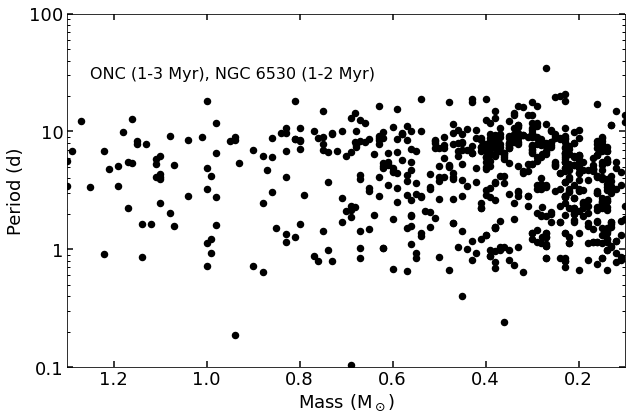

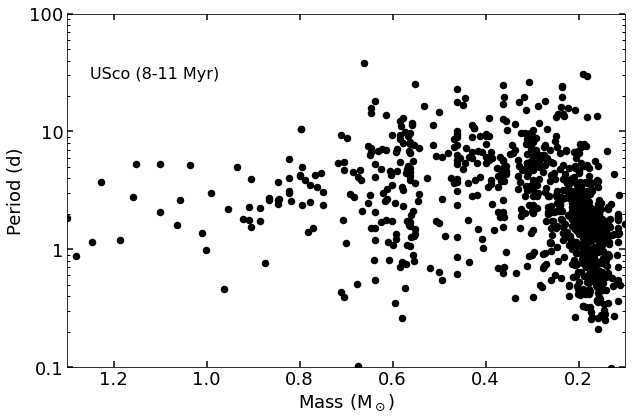

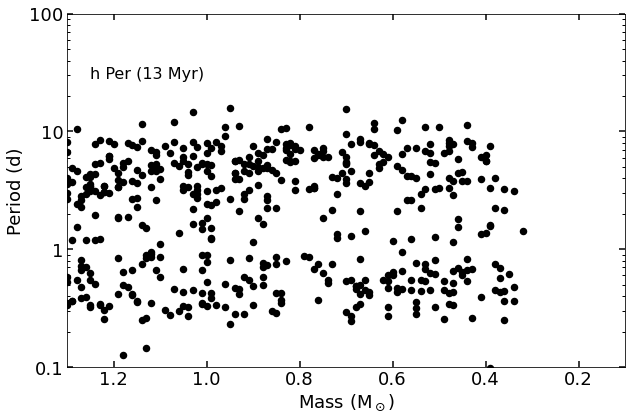

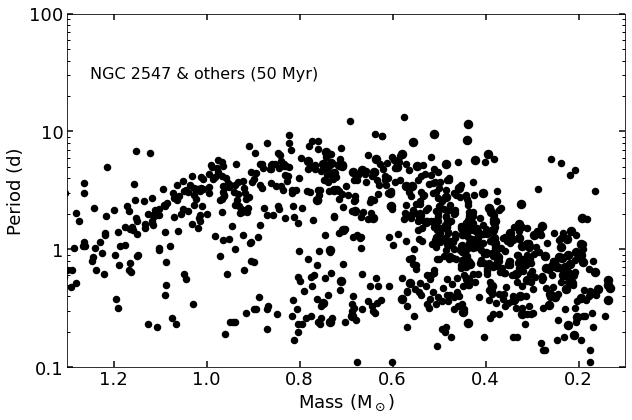

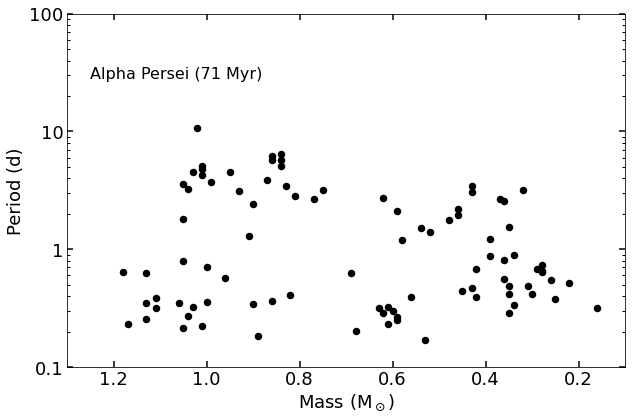

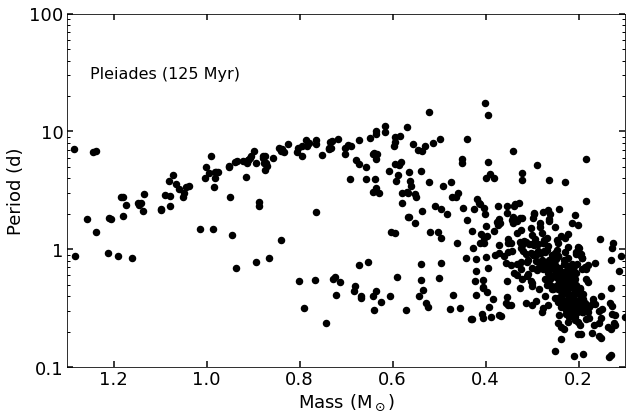

In [196]:
# PMS and ZAMS


fig, ax = setup_axes()
ax.plot(onc_mass,onc_per,'o',color=new_color,**need_params)
ax.plot(ngc6530_mass,ngc6530_per,'o',color=new_color,**need_params)
ax.text(textx0,texty0,"ONC (1-3 Myr), NGC 6530 (1-2 Myr)",fontsize=cluster_fontsize,color=new_color)
plt.savefig("cluster_periods_log_ONC_NGC6530.png",bbox_inches="tight",dpi=300,facecolor="w")


fig, ax = setup_axes()
ax.plot(usco_mass,usco_per,'o',color=new_color,**need_params)
ax.text(textx0,texty0,"USco (8-11 Myr)",fontsize=cluster_fontsize,color=new_color)
plt.savefig("cluster_periods_log_USco.png",bbox_inches="tight",dpi=300,facecolor="w")

fig, ax = setup_axes()
ax.plot(hper_mass,hper_per,'o',color=gb_color,**need_params)
ax.text(textx0,texty0,"h Per (13 Myr)",fontsize=cluster_fontsize,color=gb_color)
plt.savefig("cluster_periods_log_hPer.png",bbox_inches="tight",dpi=300,facecolor="w")

fig, ax = setup_axes()
ax.plot(zams_mass, zams_per, 'o',color=new_color,**need_params)
# axes[2].plot(ngc2547_mass,ngc2547_per,'o',ms=3,color=gb_color,mfc="none",mew=0.75)
ax.plot(ngc2547_mass,ngc2547_per,'o',color=gb_color)
ax.text(textx0,texty0,"NGC 2547 & others (50 Myr)",fontsize=cluster_fontsize)
# ax.text(textx0-0.65,texty0,"TESS periods",fontsize=cluster_fontsize,color=new_color)
plt.savefig("cluster_periods_log_ZAMS.png",bbox_inches="tight",dpi=300,facecolor="w")


fig, ax = setup_axes()
split = 0.7
ax.plot(alphaper_mass[alphaper_mass<split],alphaper_per[alphaper_mass<split],'o',color=new_color,**need_params)
ax.plot(alphaper_mass[alphaper_mass>=split],alphaper_per[alphaper_mass>=split],'o',color=gb_color,**need_params)
ax.text(textx0,texty0,"Alpha Persei (71 Myr)",fontsize=cluster_fontsize,color=new_color)
plt.savefig("cluster_periods_log_aPer.png",bbox_inches="tight",dpi=300,facecolor="w")

fig, ax = setup_axes()
ax.plot(pleiades_mass,pleiades_per,'o',color=gb_color,**need_params)
ax.text(textx0,texty0,"Pleiades (125 Myr)",fontsize=cluster_fontsize,color=gb_color)
plt.savefig("cluster_periods_log_Pleiades.png",bbox_inches="tight",dpi=300,facecolor="w")


# plt.savefig("cluster_periods_log.pdf",bbox_inches="tight")


Text(1.25, 28, 'Coma Ber (600 Myr)')

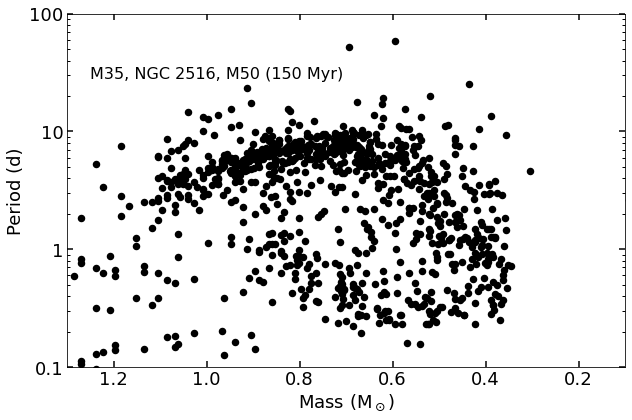

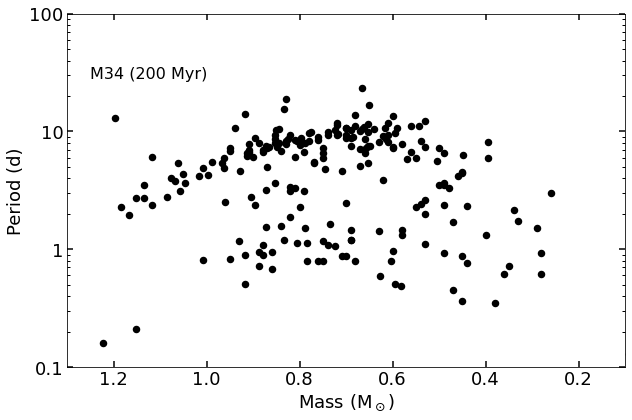

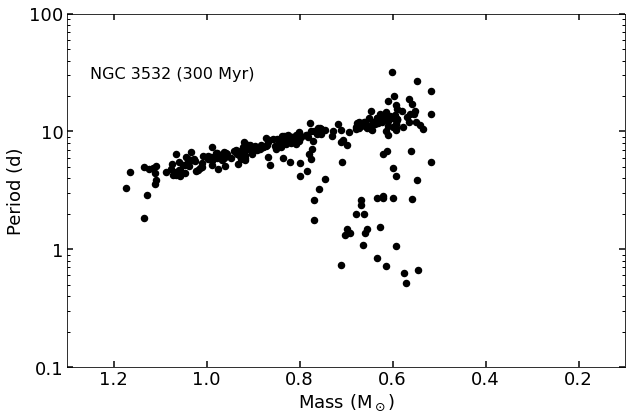

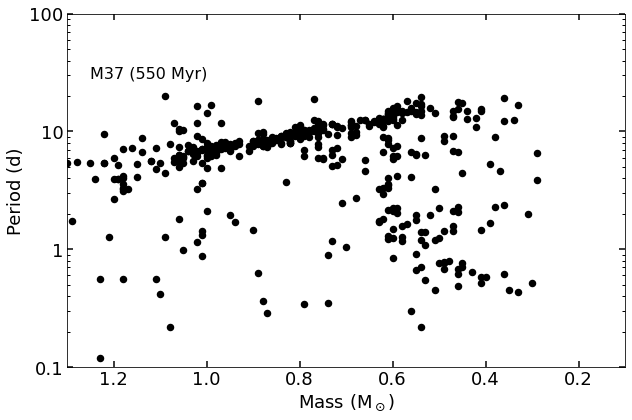

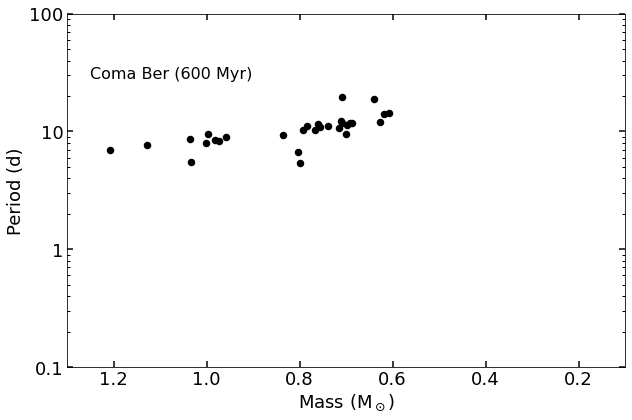

In [44]:

# early MS OCs
              
fig, ax = setup_axes()
ax.plot(ngc2516_mass,ngc2516_per,'o',color=gb_color,**grc_params)
ax.plot(m50_mass,m50_per,'o',color=gb_color,**grc_params)
ax.plot(m35_mass,m35_per,'o',color=gb_color,**need_params)
ax.text(textx0,texty0,"M35, NGC 2516, M50 (150 Myr)",fontsize=cluster_fontsize,color=gb_color)

       
fig, ax = setup_axes()
ax.plot(m34_mass,m34_per,'o',color=new_color,**need_params)
ax.plot(m34meibom_mass,m34meibom_per,'o',color=gb_color,**need_params)
ax.text(textx0,texty0,"M34 (200 Myr)",fontsize=cluster_fontsize,color=new_color)

fig, ax = setup_axes()
ax.plot(ngc3532_mass,ngc3532_per,'o',color=new_color,**need_params)
ax.text(textx0,texty0,"NGC 3532 (300 Myr)",fontsize=cluster_fontsize,color=new_color)

fig, ax = setup_axes()
ax.plot(m37_mass,m37_per,'o',color=gb_color,**grc_params)
ax.text(textx0,texty0,"M37 (550 Myr)",fontsize=cluster_fontsize,color=gb_color)

fig, ax = setup_axes()
ax.plot(coma_mass,coma_per,'o',color=new_color,**need_params)
ax.text(textx0,texty0,"Coma Ber (600 Myr)",fontsize=cluster_fontsize,color=new_color)


Text(1.25, 0.15, 'Field Stars')

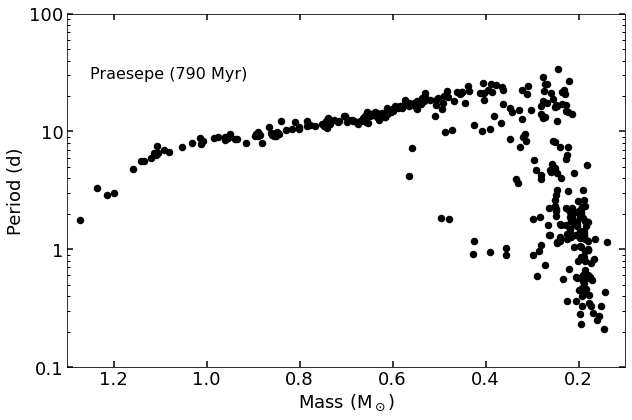

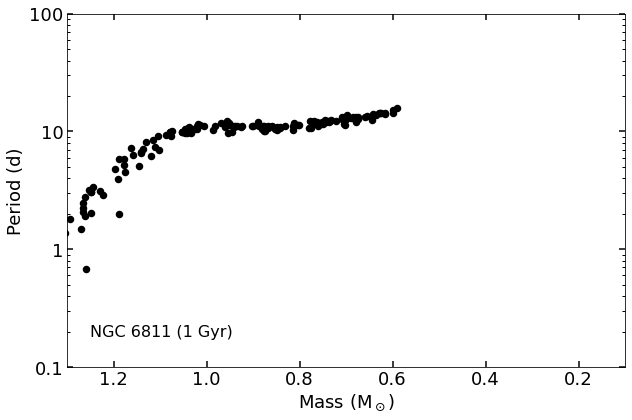

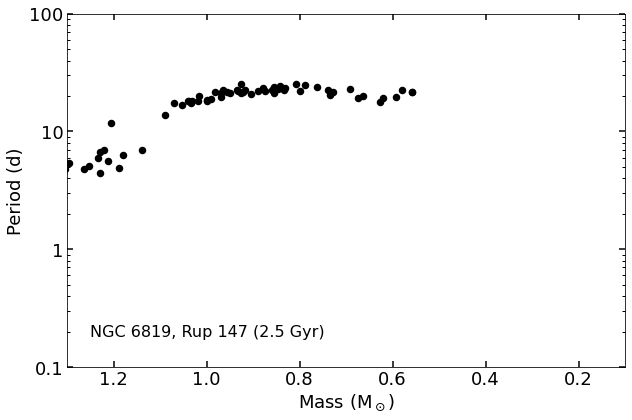

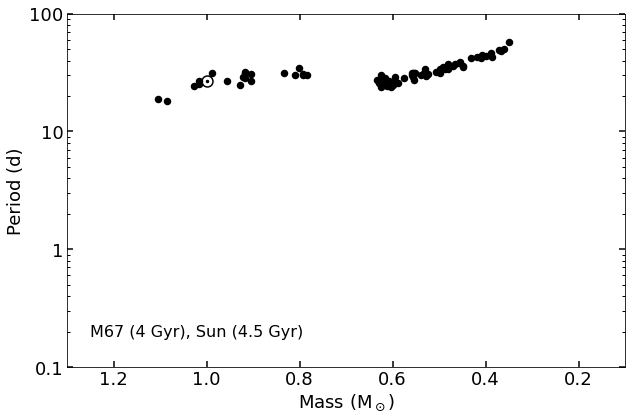

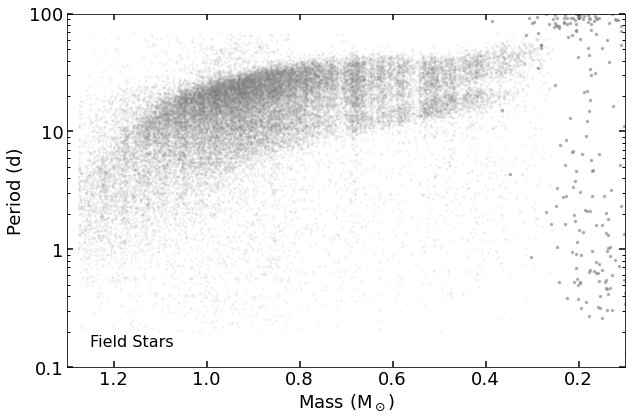

In [45]:


# old OCs, Sun, field

# TODO: distinguish my periods from the old ones
# TODO: add hyades periods
fig, ax = setup_axes()
ax.plot(praesepe_mass,praesepe_per,'o',color=gb_color,**grc_params)
ax.text(textx0,texty0,"Praesepe (790 Myr)",fontsize=cluster_fontsize)
# axes[-5].plot(hyades_mass,hyades_per,'ko',ms=3)
# axes[-5].text(textx0,texty0,"HyPra (650 Myr)",fontsize=cluster_fontsize)

fig, ax = setup_axes()
split = 0.9
ax.plot(ngc6811_mass[ngc6811_mass>=split], ngc6811_per[ngc6811_mass>=split], 
        'o',color=gb_color,**grc_params)
ax.plot(ngc6811_mass[ngc6811_mass<split], ngc6811_per[ngc6811_mass<split], 
        'o',color=gb_color,**grc_params)
ax.text(textx1,texty1*1.2,"NGC 6811 (1 Gyr)",fontsize=cluster_fontsize,color=new_color)
       
fig, ax = setup_axes()
ax.plot(rup147_mass, rup147_per, 'o',color=new_color,**grc_params)
ax.plot(ngc6819_mass[ngc6819_mass>=split], ngc6819_per[ngc6819_mass>=split], 
        'o',color=gb_color,**grc_params)
ax.plot(ngc6819_mass[ngc6819_mass<split], ngc6819_per[ngc6819_mass<split], 
        'o',color=new_color,**grc_params)
ax.text(textx1,texty1*1.2,"NGC 6819, Rup 147 (2.5 Gyr)",fontsize=cluster_fontsize,color=new_color)


fig, ax = setup_axes()
ax.plot(m67_mass, m67_per,'o',color=new_color,**need_params)
ax.plot(m67_mass2, m67_per2, 'o',color=new_color,**need_params)
ax.plot([1.0],[27],'ko',ms=2)
ax.plot([1.0],[27],'ko',ms=11,mfc="none")
ax.text(textx1,texty1*1.2,"M67 (4 Gyr), Sun (4.5 Gyr)",fontsize=cluster_fontsize,color=new_color)
# ax.text(textx1-0.45,texty1*1.2,"Sun (4.5 Gyr)",fontsize=cluster_fontsize,color=gb_color)


fig, ax = setup_axes()
ax.plot(mearth_mass,mearth_per,'o',color="Grey",alpha=0.5,ms=2)
ax.plot(kep_mass,kep_per,'.',ms=1,alpha=0.2,color="Grey")
ax.text(textx1,texty1,"Field Stars",fontsize=cluster_fontsize)


# Observation history in my clusters

## Hyades

In [112]:
target_params = {"ms":7,"color":"grey","alpha":0.75,"marker":"s","linewidth":0,"mec":"k"}
ground_params = {"ms":7,"color":"grey","alpha":0.75,"marker":"o","linewidth":0,"mec":"k"}
space_params = {"ms":8,"color":"C3","alpha":0.9,"marker":"D","linewidth":0}
gen_params = {"ms":7,"color":"k","alpha":0.9,"linewidth":0}
bin_params = gen_params.copy()
bin_params["color"] = "grey"

In [105]:
print(hfile1.dtype)
print(hfile2.dtype)

[('Roser', '<i8'), ('HIP', '<U5'), ('RAh', '<i8'), ('RAm', '<i8'), ('RAs', '<f8'), ('DEd', '<i8'), ('DEm', '<i8'), ('DEs', '<f8'), ('2MASS', '<U16'), ('EPIC', '<i8'), ('Kpmag', '<f8'), ('Mass', '<f8'), ('Binary', '<i8'), ('ap', '<f8'), ('lc', '<U3'), ('IPer', '<f8'), ('IPower', '<f8'), ('I99.9', '<f8'), ('CPer', '<f8'), ('CPower', '<f8'), ('C99.9', '<f8'), ('SPer', '<f8'), ('SPower', '<f8'), ('S99.9', '<f8'), ('Qflag', '<i8'), ('SpotEvol', '<U1'), ('MultiPer', '<U1'), ('use', '<U4'), ('K2Per', '<f8'), ('K2Power', '<f8'), ('Amp', '<f8'), ('Neigh', '<U1'), ('Blended', '<U1'), ('Other', '<U89')]
[('RSP2011', '<i8'), ('HIP', '<U8'), ('2MASS', '<U16'), ('EPIC', '<i8'), ("r'mag", '<f8'), ('Ksmag', '<f8'), ('Prot1', '<f8'), ('Pw1', '<f8'), ('Q1', '<i8'), ('Sig', '<f8'), ('Prot2', '<f8'), ('Pw2', '<f8'), ('Q2', '<i8'), ('MP?', '<U1'), ('SE?', '<U1'), ('Bl?', '<U1'), ('P', '<U1'), ('Prot4', '<f8'), ('ProtP', '<f8'), ('ProtH', '<f8'), ('ProtD', '<f8'), ('ProtA', '<f8'), ('ProtR', '<f8'), ('Gaia'

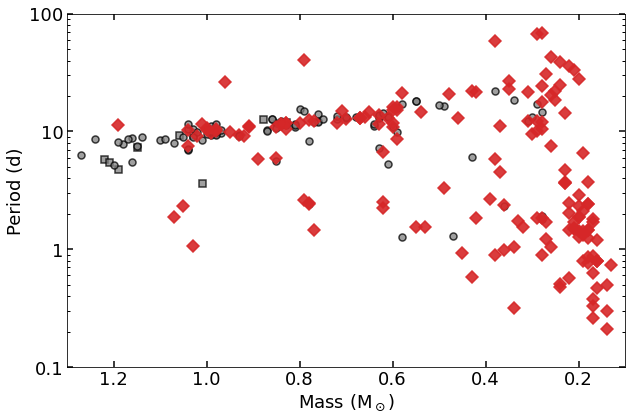

In [197]:
# Hyades observational history
fig, ax = setup_axes()
# Radick/Delorme/Lockwood
rad = (hfile2["ProtR"].mask==False)
ax.plot(hfile2["Mass"][rad],hfile2["ProtR"][rad],**target_params)

# Prosser
pros = (hfile2["ProtP"].mask==False)
ax.plot(hfile2["Mass"][pros],hfile2["ProtR"][pros],**target_params)
plt.savefig("cluster_periods_log_hyades_targeted.png",bbox_inches="tight",dpi=300,facecolor="w")


# SWASP and ASAS (Delorme and us)
swasp = (hfile2["ProtD"].mask==False)
ax.plot(hfile2["Mass"][swasp],hfile2["ProtD"][swasp],**ground_params)
asas = (hfile2["ProtA"].mask==False)
ax.plot(hfile2["Mass"][asas],hfile2["ProtA"][asas],**ground_params)

hart = (hfile2["ProtH"].mask==False)
ax.plot(hfile2["Mass"][hart],hfile2["ProtH"][hart],**ground_params)
plt.savefig("cluster_periods_log_hyades_targeted+surveys.png",bbox_inches="tight",dpi=300,facecolor="w")

# K2
k2 = (hfile2["Prot1"].mask==False) | (hfile2["Prot4"].mask==False)
ax.plot(hfile2["Mass"][k2],hfile2["Prot1"][k2],**space_params)
ax.plot(hfile2["Mass"][k2],hfile2["Prot4"][k2],**space_params)
plt.savefig("cluster_periods_log_hyades_all.png",bbox_inches="tight",dpi=300,facecolor="w")

## Praesepe

In [100]:
print(prae1.dtype)
print(prae2.dtype)
print(prae3.dtype)

[('NAME', '<U7'), ('EPIC', '<i8'), ('Mass', '<f8'), ("r'mag", '<f8'), ('Kmag', '<f8'), ('Prot1', '<f8'), ('Power1', '<f8'), ('Qual1', '<i8'), ('Clean?', '<U1'), ('Threshold', '<f8'), ('Prot2', '<f8'), ('Power2', '<f8'), ('Qual2', '<i8'), ('Multi-Prot?', '<U1'), ('Spot-Evol?', '<U1'), ('Blended?', '<U1'), ('Binary', '<U4'), ('Raw-Amp', '<f8'), ('Smoothed-Amp', '<f8'), ('Prot-Flag', '<U1'), ('PTF-Prot', '<f8'), ('SWASP-Prot', '<f8'), ('Scholz-Prot', '<f8'), ('Kovacs-Prot', '<f8'), ('Kpmag', '<f8'), ('Notes', '<U92')]
[('RAdeg', '<f8'), ('DEdeg', '<f8'), ('2MASS', '<U23'), ('EPIC', '<i8'), ('D17-Prot', '<f8'), ('D17-P', '<U1'), ('Prot', '<f8'), ('P', '<U2'), ('dCMD', '<f8'), ('eCMD', '<f8'), ('RVel', '<f8'), ('e_RVel', '<f8'), ('epsi', '<f8'), ('gmag', '<f8'), ('b-r', '<f8'), ('Teff', '<f8'), ('Gaia', '<U18'), ('SFlag', '<U5')]
[('EPIC', '<i8'), ('EDR3Name', '<U28'), ('2MASS', '<U27'), ('RA', '<f8'), ('DEC', '<f8'), ('pmra', '<f8'), ('pmdec', '<f8'), ('e_pmra', '<f8'), ('e_pmdec', '<f8'),

In [101]:
sub1 = prae1["EPIC","Prot1","Prot-Flag","PTF-Prot","SWASP-Prot","Scholz-Prot","Kovacs-Prot"]
prae = table.join(prae2[prae2["EPIC"].mask==False],sub1)
pmass = kh_teff_mass(np.asarray(prae["Teff"]))
pmass3 = kh_teff_mass(np.asarray(prae3["Teff"]))

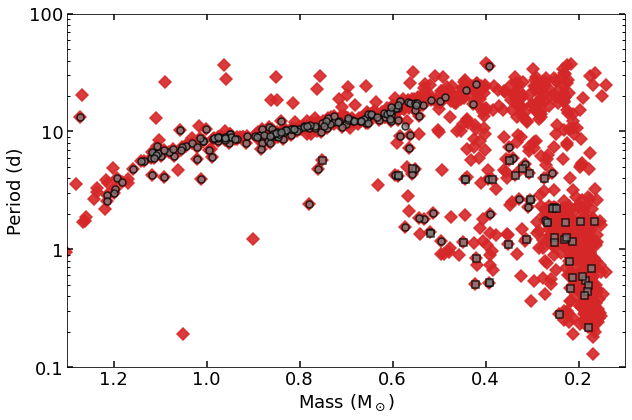

In [198]:
# Praesepe observational history
fig, ax = setup_axes()

# SWASP and PTF (Delorme, Agueros)
swasp = (prae["SWASP-Prot"].mask==False)
ax.plot(pmass[swasp],prae["SWASP-Prot"][swasp],**ground_params)

ptf = (prae["PTF-Prot"].mask==False)
ax.plot(pmass[ptf],prae["PTF-Prot"][ptf],**ground_params)

# Scholz (targeted)
scholz = (prae["Scholz-Prot"].mask==False)
ax.plot(pmass[scholz],prae["Scholz-Prot"][scholz],**target_params)

# HATNet (Kovacs)
hat = (prae["Kovacs-Prot"].mask==False) & ~swasp
ax.plot(pmass[hat],prae["Kovacs-Prot"][hat],zorder=-10,**ground_params)

# K2
# k2 = (pfile["D17-Prot"].mask==False) | (pfile["Prot"].mask==False)
ax.plot(pmass,prae["D17-Prot"],zorder=-11,**space_params)
k2_new = (prae3["Prot"]>0) & (prae3["PreviousProt"].mask==True) #& (prae3["PreviousProt"]<0)
ax.plot(pmass3[k2_new],prae3["Prot"][k2_new],zorder=-12,**space_params)
plt.savefig("cluster_periods_log_praesepe_all.png",bbox_inches="tight",dpi=300,facecolor="w")

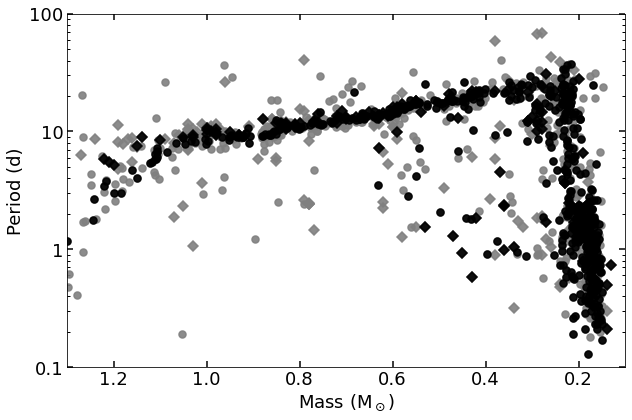

In [199]:
# HyPra model comparison
fig, ax = setup_axes()

sin = ((hfile2["SFlag"]=="YYYY") | (hfile2["SFlag"]=="-YY-") | 
       (hfile2["SFlag"]=="YYY-") | (hfile2["SFlag"]=="-YYY"))
for colname in ["ProtR","ProtP","ProtD","ProtA","ProtH","Prot4","Prot1"]:
    ax.plot(hfile2["Mass"],hfile2[colname],'D',**bin_params)
    ax.plot(hfile2["Mass"][sin],hfile2[colname][sin],'D',zorder=10,**gen_params)


ax.plot(pmass3,prae3["Prot"],'o',**bin_params)
sin = prae3["Binary"]==0
ax.plot(pmass3[sin],prae3["Prot"][sin],'o',zorder=12,**gen_params)
plt.savefig("cluster_periods_log_hypra_cleaned.png",bbox_inches="tight",dpi=300,facecolor="w")

## Model comparisons

In [132]:
m15 = at.read(os.path.expanduser("~/Dropbox/Models/Mattea2015_00653Myr.txt"),
              names=["Mass","Prot"])
m15b = at.read(os.path.expanduser("~/Dropbox/Models/Mattea2015_00574Myr.txt"),
              names=["Mass","Prot"])
m20 = at.read(os.path.expanduser("~/Dropbox/Models/Mattea2020_00653Myr.txt"),
              names=["Mass","Prot"])

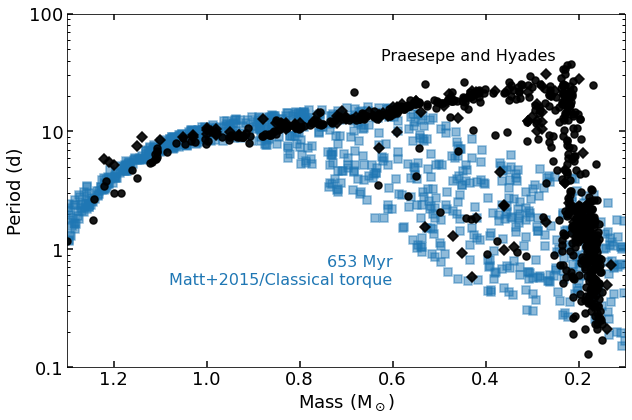

In [200]:
# HyPra model comparison
fig, ax = setup_axes()

maxn = 800
ax.plot(m15["Mass"][:maxn],m15["Prot"][:maxn],'s',alpha=0.5)
ax.text(0.6,0.9,"653 Myr\nMatt+2015/Classical torque",verticalalignment="top",horizontalalignment="right",color="C0")

sin = ((hfile2["SFlag"]=="YYYY") | (hfile2["SFlag"]=="-YY-") | 
       (hfile2["SFlag"]=="YYY-") | (hfile2["SFlag"]=="-YYY"))
for colname in ["ProtR","ProtP","ProtD","ProtA","ProtH","Prot4","Prot1"]:
#     ax.plot(hfile2["Mass"],hfile2[colname],'D',**bin_params)
    ax.plot(hfile2["Mass"][sin],hfile2[colname][sin],'D',zorder=10,**gen_params)


# ax.plot(pmass3,prae3["Prot"],'o',**bin_params)
sin = prae3["Binary"]==0
ax.plot(pmass3[sin],prae3["Prot"][sin],'o',zorder=12,**gen_params)
ax.text(0.25,40,"Praesepe and Hyades",horizontalalignment="right",color="k")
plt.savefig("model_periods_log_hypra_matt15_653Myr.png",bbox_inches="tight",dpi=300,facecolor="w")

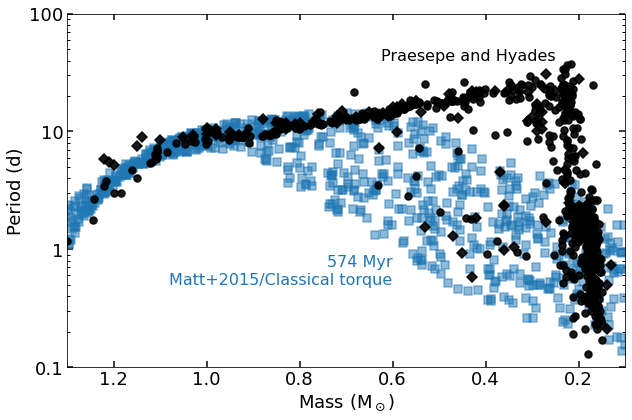

In [201]:
# HyPra model comparison
fig, ax = setup_axes()

maxn = 800
ax.plot(m15b["Mass"][:maxn],m15b["Prot"][:maxn],'s',alpha=0.5)
ax.text(0.6,0.9,"574 Myr\nMatt+2015/Classical torque",verticalalignment="top",horizontalalignment="right",color="C0")

sin = ((hfile2["SFlag"]=="YYYY") | (hfile2["SFlag"]=="-YY-") | 
       (hfile2["SFlag"]=="YYY-") | (hfile2["SFlag"]=="-YYY"))
for colname in ["ProtR","ProtP","ProtD","ProtA","ProtH","Prot4","Prot1"]:
#     ax.plot(hfile2["Mass"],hfile2[colname],'D',**bin_params)
    ax.plot(hfile2["Mass"][sin],hfile2[colname][sin],'D',zorder=10,**gen_params)


# ax.plot(pmass3,prae3["Prot"],'o',**bin_params)
sin = prae3["Binary"]==0
ax.plot(pmass3[sin],prae3["Prot"][sin],'o',zorder=12,**gen_params)
ax.text(0.25,40,"Praesepe and Hyades",horizontalalignment="right",color="k")
plt.savefig("model_periods_log_hypra_matt15_574Myr.png",bbox_inches="tight",dpi=300,facecolor="w")

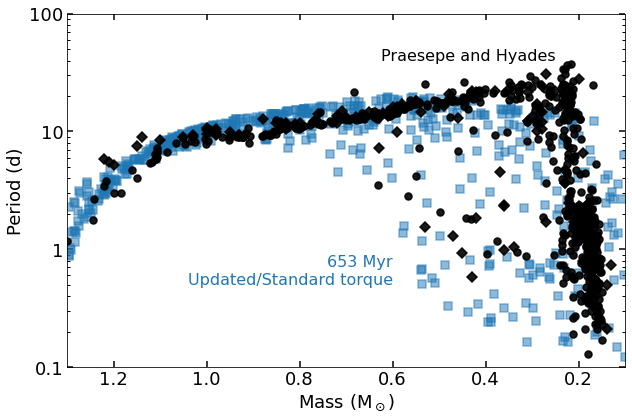

In [202]:
# HyPra model comparison
fig, ax = setup_axes()

maxn = 800
ax.plot(m20["Mass"][:maxn],m20["Prot"][:maxn],'s',alpha=0.5)
ax.text(0.6,0.9,"653 Myr\nUpdated/Standard torque",verticalalignment="top",horizontalalignment="right",color="C0")

sin = ((hfile2["SFlag"]=="YYYY") | (hfile2["SFlag"]=="-YY-") | 
       (hfile2["SFlag"]=="YYY-") | (hfile2["SFlag"]=="-YYY"))
for colname in ["ProtR","ProtP","ProtD","ProtA","ProtH","Prot4","Prot1"]:
#     ax.plot(hfile2["Mass"],hfile2[colname],'D',**bin_params)
    ax.plot(hfile2["Mass"][sin],hfile2[colname][sin],'D',zorder=10,**gen_params)


# ax.plot(pmass3,prae3["Prot"],'o',**bin_params)
sin = prae3["Binary"]==0
ax.plot(pmass3[sin],prae3["Prot"][sin],'o',zorder=12,**gen_params)
ax.text(0.25,40,"Praesepe and Hyades",horizontalalignment="right",color="k")
plt.savefig("model_periods_log_hypra_matt22_653Myr.png",bbox_inches="tight",dpi=300,facecolor="w")

In [143]:
def barnes_Iseq(b_v,age,a=0.7725,b=0.601,c=0.4,n=0.5189):
    # Barnes (2007) as referenced in Angus (2015)
    return age**n * a * (b_v - c)**b

In [172]:
def barnes_Cseq(b_v,age):
    edenom = 100*((b_v+0.1-age/3000))**3
    cseq = 0.2 * np.exp(age/edenom)
    iseq = barnes_Iseq(b_v,age)
    cseq[cseq>iseq] = np.nan
    return cseq

In [184]:
barnes_mass = np.linspace(0.3,1.3,50)
barnes_b_v = pm_mass_bv(barnes_mass)
barnes_Ihypra = barnes_Iseq(barnes_b_v,650)
barnes_Chypra = barnes_Cseq(barnes_b_v,650)

angus_Ihypra = barnes_Iseq(barnes_b_v,650,a=0.4,b=0.31,c=0.45,n=0.55)

<ipython-input-143-08cb7c27e1dc>:2: RuntimeWarning: invalid value encountered in power
  return age**n * a * (b_v - c)**b


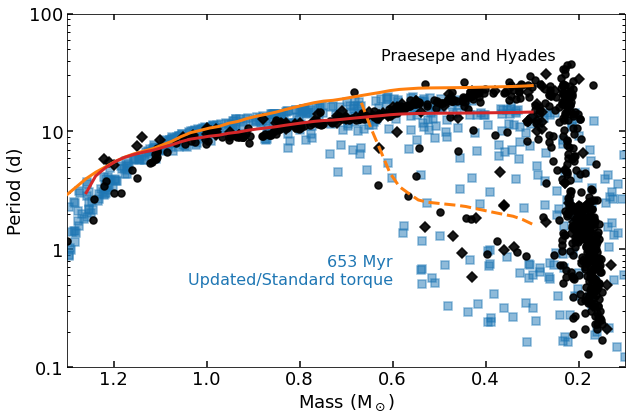

In [203]:
# HyPra model comparison
fig, ax = setup_axes()

maxn = 800
ax.plot(m20["Mass"][:maxn],m20["Prot"][:maxn],'s',alpha=0.5)
ax.text(0.6,0.9,"653 Myr\nUpdated/Standard torque",verticalalignment="top",horizontalalignment="right",color="C0")

sin = ((hfile2["SFlag"]=="YYYY") | (hfile2["SFlag"]=="-YY-") | 
       (hfile2["SFlag"]=="YYY-") | (hfile2["SFlag"]=="-YYY"))
for colname in ["ProtR","ProtP","ProtD","ProtA","ProtH","Prot4","Prot1"]:
#     ax.plot(hfile2["Mass"],hfile2[colname],'D',**bin_params)
    ax.plot(hfile2["Mass"][sin],hfile2[colname][sin],'D',zorder=10,**gen_params)


# ax.plot(pmass3,prae3["Prot"],'o',**bin_params)
sin = prae3["Binary"]==0
ax.plot(pmass3[sin],prae3["Prot"][sin],'o',zorder=12,**gen_params)
ax.text(0.25,40,"Praesepe and Hyades",horizontalalignment="right",color="k")

ax.plot(barnes_mass,barnes_Ihypra,lw=3,zorder=20,color="C1")
ax.plot(barnes_mass,barnes_Chypra,lw=3,zorder=20,color="C1",ls="--")
ax.plot(barnes_mass,angus_Ihypra,lw=3,zorder=21,color="C3")
plt.savefig("model_periods_log_hypra_matt22_653Myr_barnes03.png",bbox_inches="tight",dpi=300,facecolor="w")

## ZAMS

In [190]:
m20z = at.read(os.path.expanduser("~/Dropbox/Models/Mattea2020_00060Myr.txt"),
              names=["Mass","Prot"])

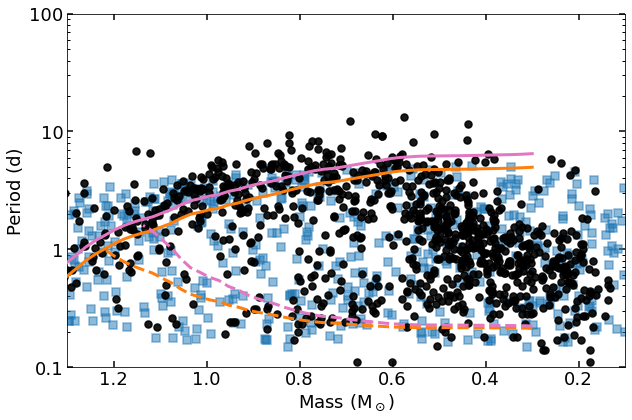

In [205]:
# HyPra model comparison
fig, ax = setup_axes()

maxn = 800
ax.plot(m20z["Mass"][:maxn],m20z["Prot"][:maxn],'s',alpha=0.5)
# ax.text(0.6,0.9,"653 Myr\nUpdated/Standard torque",verticalalignment="top",horizontalalignment="right",color="C0")

ax.plot(zams_mass, zams_per, 'o',**gen_params)
ax.plot(ngc2547_mass,ngc2547_per,'o',**gen_params)

barnes_Izams = barnes_Iseq(barnes_b_v,30)
barnes_Czams = barnes_Cseq(barnes_b_v,30)
ax.plot(barnes_mass,barnes_Izams,lw=3,zorder=20,color="C1")
ax.plot(barnes_mass,barnes_Czams,lw=3,zorder=20,color="C1",ls="--")

barnes_Izams = barnes_Iseq(barnes_b_v,50)
barnes_Czams = barnes_Cseq(barnes_b_v,50)
ax.plot(barnes_mass,barnes_Izams,lw=3,zorder=20,color="C6")
ax.plot(barnes_mass,barnes_Czams,lw=3,zorder=20,color="C6",ls="--")

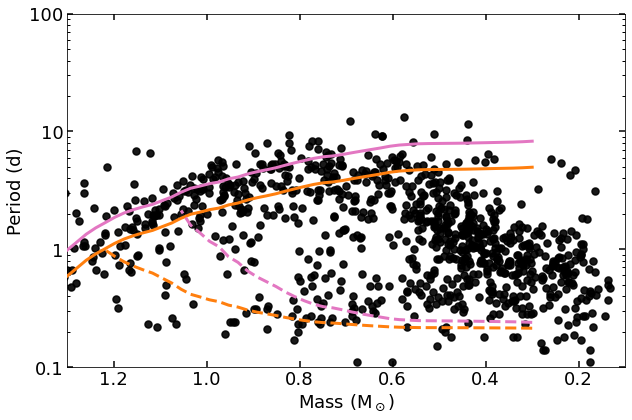

In [207]:
# HyPra model comparison
fig, ax = setup_axes()

# maxn = 800
# ax.plot(m20z["Mass"][:maxn],m20z["Prot"][:maxn],'s',alpha=0.5)
# ax.text(0.6,0.9,"653 Myr\nUpdated/Standard torque",verticalalignment="top",horizontalalignment="right",color="C0")

ax.plot(zams_mass, zams_per, 'o',**gen_params)
ax.plot(ngc2547_mass,ngc2547_per,'o',**gen_params)

barnes_Izams = barnes_Iseq(barnes_b_v,30)
barnes_Czams = barnes_Cseq(barnes_b_v,30)
ax.plot(barnes_mass,barnes_Izams,lw=3,zorder=20,color="C1")
ax.plot(barnes_mass,barnes_Czams,lw=3,zorder=20,color="C1",ls="--")

barnes_Izams = barnes_Iseq(barnes_b_v,80)
barnes_Czams = barnes_Cseq(barnes_b_v,80)
ax.plot(barnes_mass,barnes_Izams,lw=3,zorder=20,color="C6")
ax.plot(barnes_mass,barnes_Czams,lw=3,zorder=20,color="C6",ls="--")

In [224]:
mass = ["010","020","030","040","050","060","070","080","090","100","110","120","130"]
init_periods = ["0.3d","0.4d","0.6d","0.8d","1.5d","12d","3d","4.5d","6d","8d"]
print(len(mass),len(init_periods))

13 10


In [263]:
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=10, vmax=5000)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis_r)

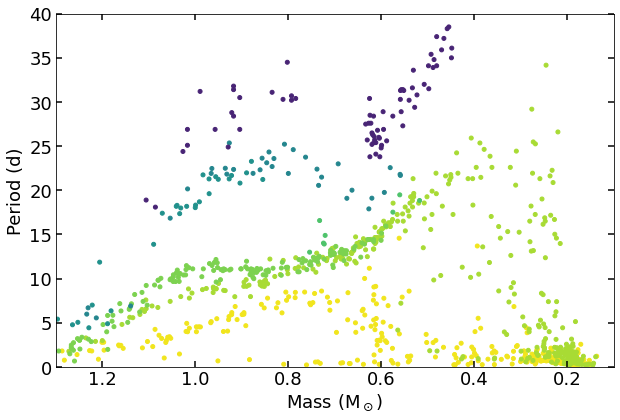

In [276]:
curtis_mass = kh_teff_mass(curtis["Teff"])
def plot_curtis_clusters(ax):
    ax.scatter(curtis_mass,curtis["Prot"],c=curtis["Age"]*1000,norm=norm,
               cmap=cm.viridis_r,s=16)
    ax.scatter(m67_mass, m67_per,c=np.ones_like(m67_mass)*4500,norm=norm,cmap=cm.viridis_r,s=16)
    ax.scatter(m67_mass2, m67_per2,c=np.ones_like(m67_mass2)*4500,norm=norm,cmap=cm.viridis_r,s=16)
fig,ax = setup_axes_linear()
plot_curtis_clusters(ax)

In [241]:
def plot_gossage_m15(desired_age,ax):
    ### Gossage models, M15 wind
    model = "Gossage et al. (2021), M15 Wind"
    model_f = "Gossage21_M15"

    gossM15_mass = np.zeros(15*11)
    gossM15_prot = np.zeros(15*11)

    ct = 0
    for m in mass:
        for p in init_periods:
            gossM15_mass[ct] = float(m)/100
            hfile = os.path.join(model_dir,
                                 f"MIST_M15_mbraking_feh_p0.00_histfiles/00{m}M_dir/LOGS/{gossM15_mass[ct]:.1f}M_history_prot{p}0_M15_d02d4_0.5hp_1.4d30K_0.22m_2.6p_3myr_alt3prot_henyey1.82mlta.data")
            # read in the history file (for a particular mass, initial period, and braking formalism)
            data = np.genfromtxt(hfile, skip_header=5, names=True)

            # extract rotation periods at all ages
            periods = 2*np.pi/(86400*data['surf_avg_omega'])

            # mark the index of a desired age [Myr]
            ages_myr = data['star_age']/1e6
            age_diffs = abs(ages_myr - desired_age)
            age_index = np.where(age_diffs == min(age_diffs))[0][0]

            # then extract the rotation period at the desired age
            gossM15_prot[ct] = periods[age_index]
            ct += 1

    # goss_bp_rp = mass_to_bp_rp(goss_mass)
    ax.plot(gossM15_mass,gossM15_prot,'*',color="teal",ms=12)
    ax.set_title(model)
    
def plot_gossage_g18(desired_age,ax):
    ### Gossage models, G18 wind
    model = "Gossage et al. (2021), G18 Wind"
    model_f = "Gossage21_G18"

    gossG18_mass = np.zeros(15*11)
    gossG18_prot = np.zeros(15*11)

    ct = 0
    for m in mass:
        for p in init_periods:
            gossG18_mass[ct] = float(m)/100
            hfile = os.path.join(model_dir,
                                 f"MIST_G18_mbraking_feh_p0.00_histfiles/00{m}M_dir/LOGS/{gossG18_mass[ct]:.1f}M_history_prot{p}0_G18_d02d4_0.5hp_1d_3.2d41c_0.5b_0.03a_3myr_alt3prot_henyey1.82mlta.data")
            # read in the history file (for a particular mass, initial period, and braking formalism)
            data = np.genfromtxt(hfile, skip_header=5, names=True)

            # extract rotation periods at all ages
            periods = 2*np.pi/(86400*data['surf_avg_omega'])

            # mark the index of a desired age [Myr]
            ages_myr = data['star_age']/1e6
            age_diffs = abs(ages_myr - desired_age)
            age_index = np.where(age_diffs == min(age_diffs))[0][0]

            # then extract the rotation period at the desired age
            gossG18_prot[ct] = periods[age_index]
            ct += 1

    ax.plot(gossG18_mass,gossG18_prot,'*',color="teal",ms=12)
    ax.set_title(model)

In [265]:
spada_ages = np.array([0.10, 0.12, 0.15, 0.20, 0.22, 0.25, 0.30, 0.40, 0.50, 
                       0.60, 0.70, 1.00, 1.50, 2.00, 2.50, 4.00, 4.57])*1000 # Gyr to Myr
spada_ages = spada_ages[:-3]
nage = len(spada_ages)

def plot_gossage_m15_gyrochrones(init_period,ax):
    ### Gossage models, M15 wind
    model = "Gossage et al. (2021), M15 Wind"
    model_f = "Gossage21_M15"

    gossM15_mass = np.asarray(mass,"float")/100
    gossM15_prot = np.zeros(nage*len(mass)).reshape((nage,-1))
    gossM15_age = np.zeros(nage*len(mass)).reshape((nage,-1))

    for i,m in enumerate(mass):
        p = init_period
        hfile = os.path.join(model_dir,
                             f"MIST_M15_mbraking_feh_p0.00_histfiles/00{m}M_dir/LOGS/{gossM15_mass[i]:.1f}M_history_prot{p}0_M15_d02d4_0.5hp_1.4d30K_0.22m_2.6p_3myr_alt3prot_henyey1.82mlta.data")
        # read in the history file (for a particular mass, initial period, and braking formalism)
        data = np.genfromtxt(hfile, skip_header=5, names=True)

        # extract rotation periods at all ages
        periods = 2*np.pi/(86400*data['surf_avg_omega'])

        for j,desired_age in enumerate(spada_ages):
            # mark the index of a desired age [Myr]
            ages_myr = data['star_age']/1e6
            age_diffs = abs(ages_myr - desired_age)
            age_index = np.where(age_diffs == min(age_diffs))[0][0]

            # then extract the rotation period at the desired age
            gossM15_age[j,i] = ages_myr[age_index]
            gossM15_prot[j,i] = periods[age_index]
        
    for j,desired_age in enumerate(spada_ages):
        ax.plot(gossM15_mass,gossM15_prot[j],color=mapper.to_rgba(desired_age))
    
    
def plot_gossage_g18_gyrochrones(init_period,ax):
    ### Gossage models, G18 wind
    model = "Gossage et al. (2021), G18 Wind"
    model_f = "Gossage21_G18"

    gossG18_mass = np.asarray(mass,"float")/100
    gossG18_prot = np.zeros(nage*len(mass)).reshape((nage,-1))
    gossG18_age = np.zeros(nage*len(mass)).reshape((nage,-1))

    for i,m in enumerate(mass):
        p = init_period
        hfile = os.path.join(model_dir,
                             f"MIST_G18_mbraking_feh_p0.00_histfiles/00{m}M_dir/LOGS/{gossG18_mass[i]:.1f}M_history_prot{p}0_G18_d02d4_0.5hp_1d_3.2d41c_0.5b_0.03a_3myr_alt3prot_henyey1.82mlta.data")
#         hfile = os.path.join(model_dir,
#                              f"MIST_G18_mbraking_feh_p0.00_histfiles/00{m}M_dir/LOGS/{gossG18_mass[c]:.1f}M_history_prot{p}0_G18_d02d4_0.5hp_1d_3.2d41c_0.5b_0.03a_3myr_alt3prot_henyey1.82mlta.data")
        # read in the history file (for a particular mass, initial period, and braking formalism)
        data = np.genfromtxt(hfile, skip_header=5, names=True)

        # extract rotation periods at all ages
        periods = 2*np.pi/(86400*data['surf_avg_omega'])

        for j,desired_age in enumerate(spada_ages):
            # mark the index of a desired age [Myr]
            ages_myr = data['star_age']/1e6
            age_diffs = abs(ages_myr - desired_age)
            age_index = np.where(age_diffs == min(age_diffs))[0][0]

            # then extract the rotation period at the desired age
            gossG18_age[j,i] = ages_myr[age_index]
            gossG18_prot[j,i] = periods[age_index]
        
    for j,desired_age in enumerate(spada_ages):
        ax.plot(gossG18_mass,gossG18_prot[j],color=mapper.to_rgba(desired_age))


In [266]:
init_periods

['0.3d', '0.4d', '0.6d', '0.8d', '1.5d', '12d', '3d', '4.5d', '6d', '8d']

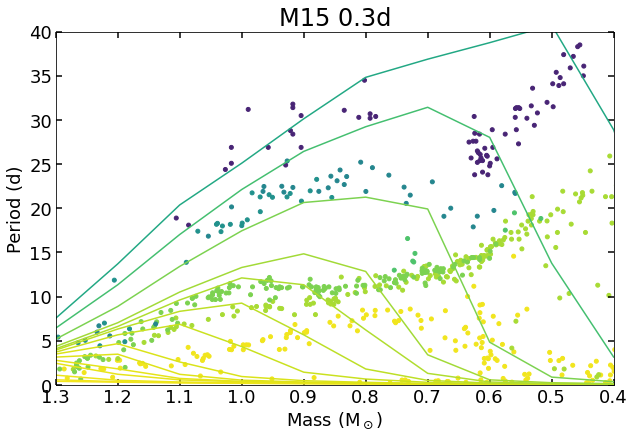

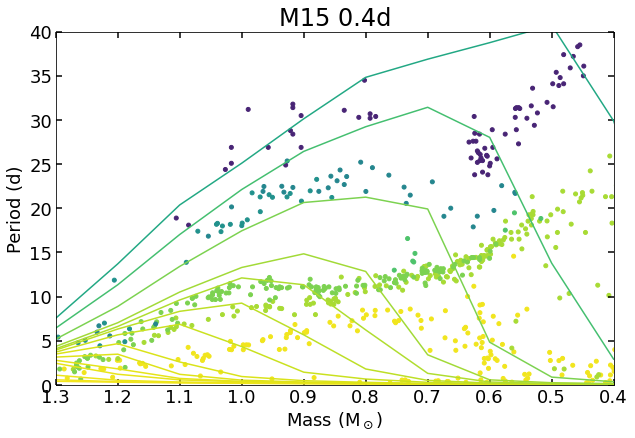

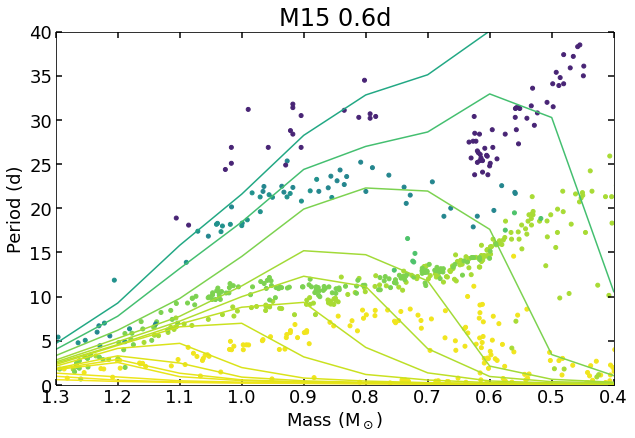

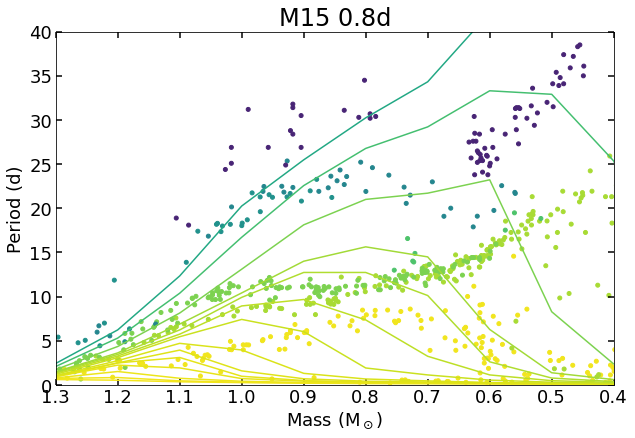

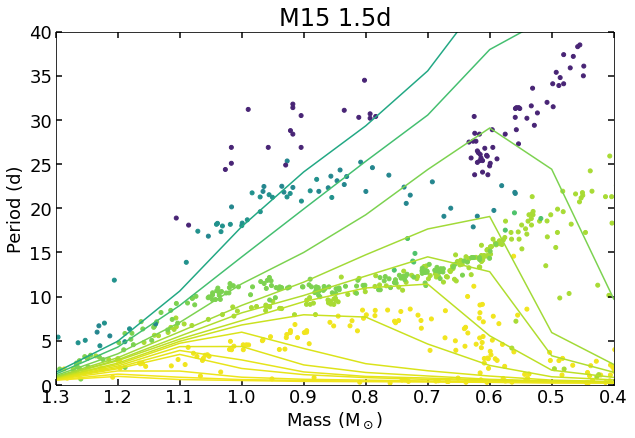

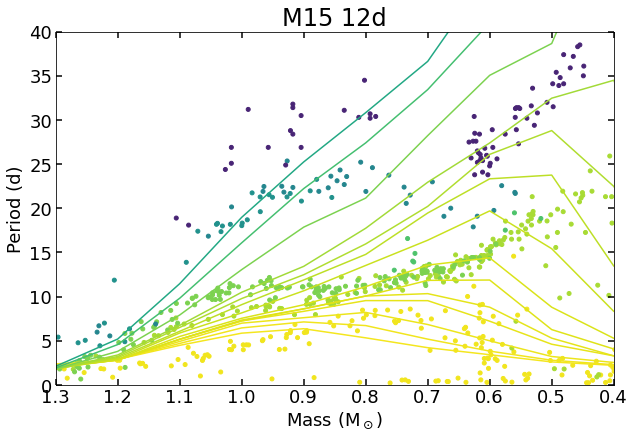

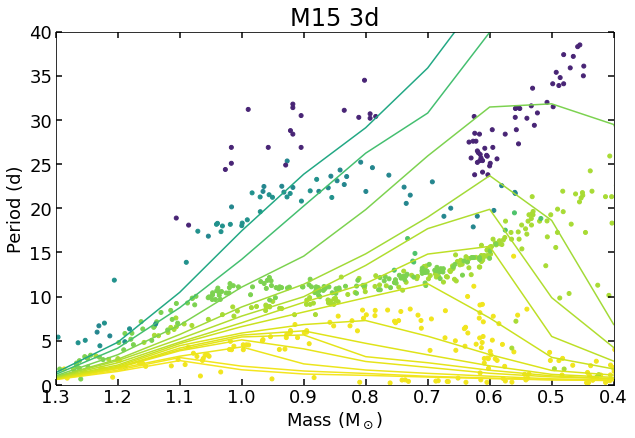

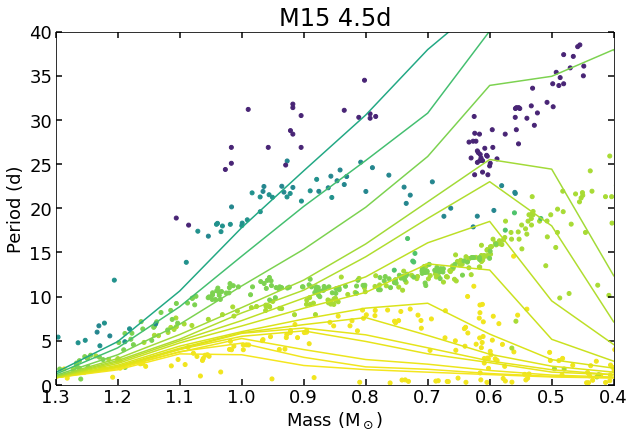

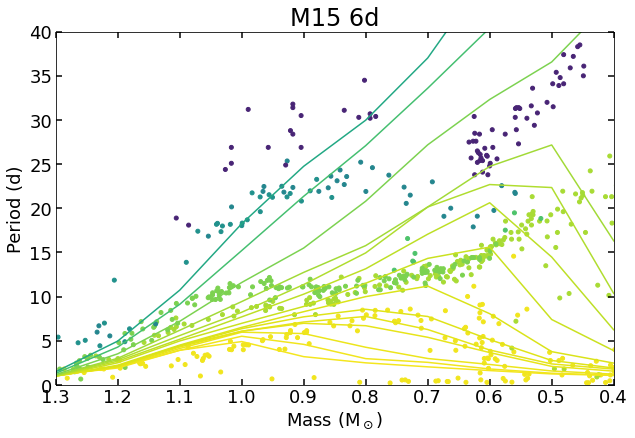

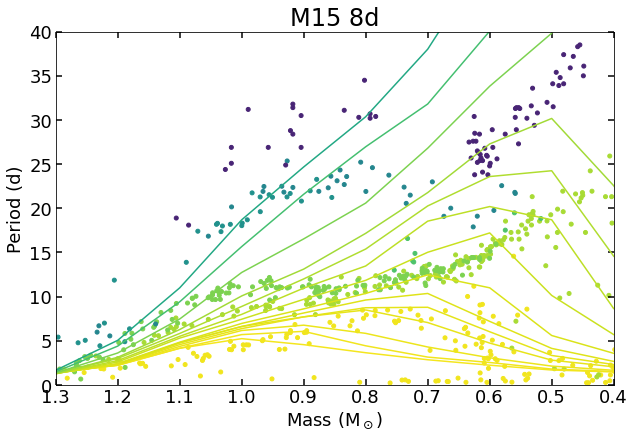

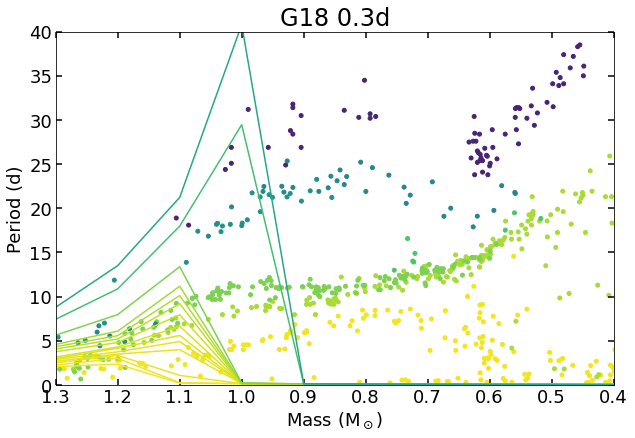

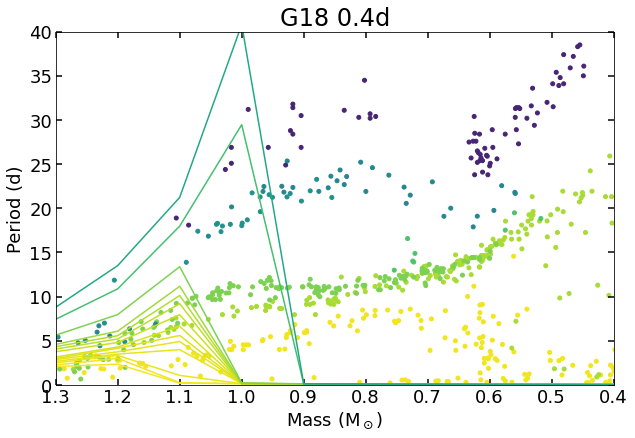

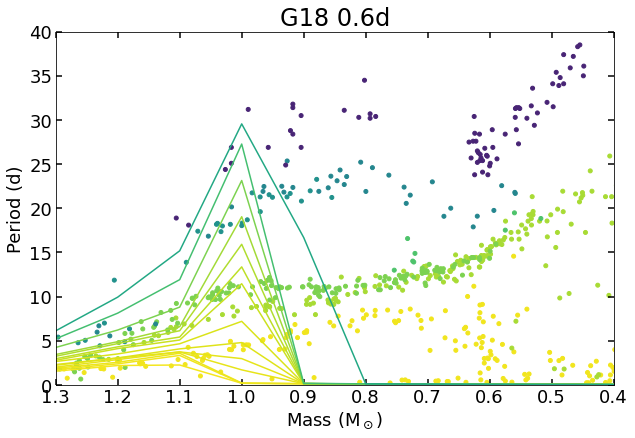

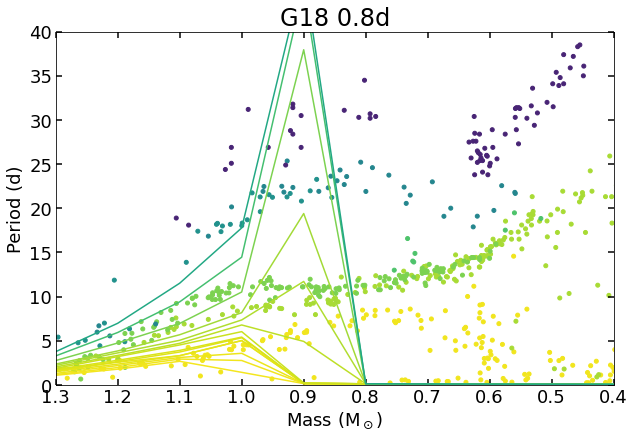

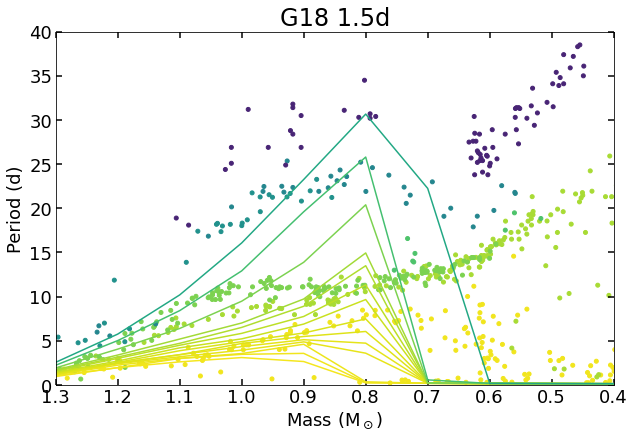

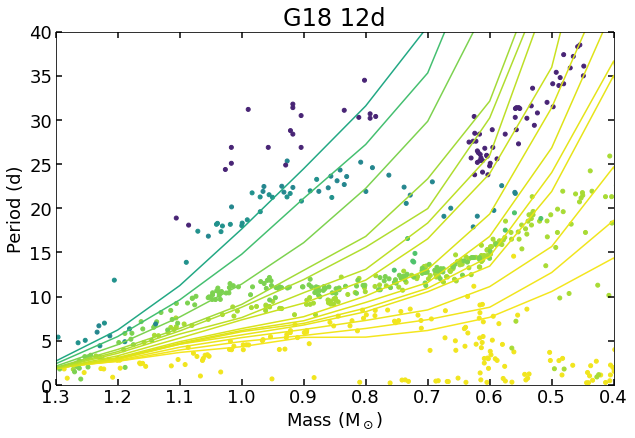

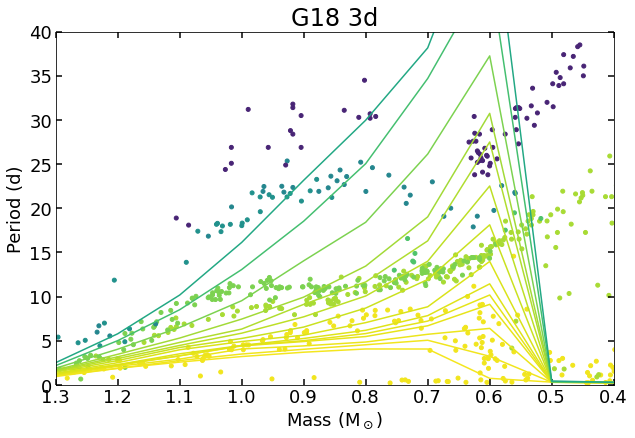

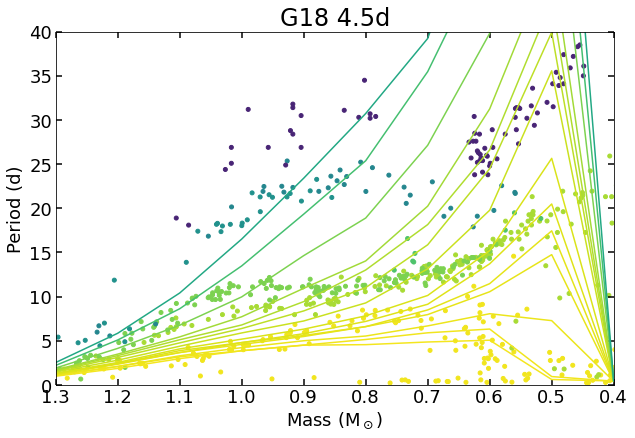

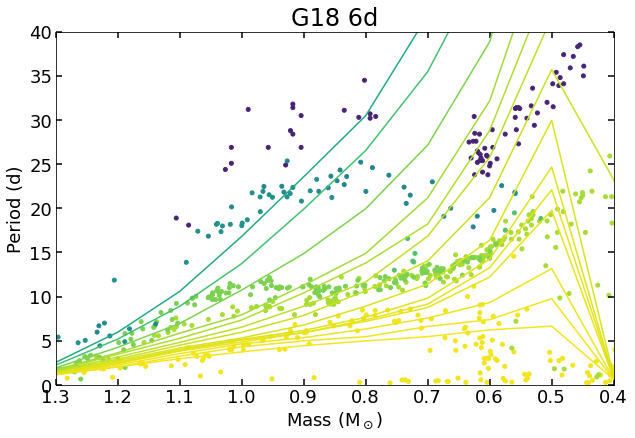

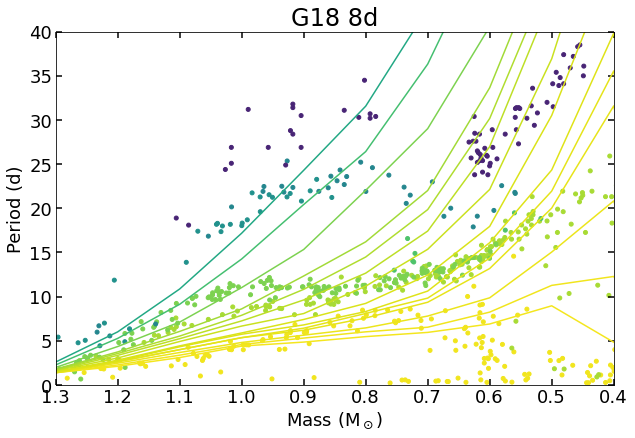

In [277]:
for per in init_periods:
    fig, ax = setup_axes_linear()
    plot_gossage_m15_gyrochrones(per,ax)
    ax.set_xlim(1.3,0.4)
    ax.set_title("M15 "+per)
    plot_curtis_clusters(ax)
    
for per in init_periods:
    fig, ax = setup_axes_linear()
    plot_gossage_g18_gyrochrones(per,ax)
    ax.set_xlim(1.3,0.4)
    ax.set_title("G18 "+per)
    plot_curtis_clusters(ax)

Text(0.5, 1.0, 'Gossage et al. (2021), G18 Wind')

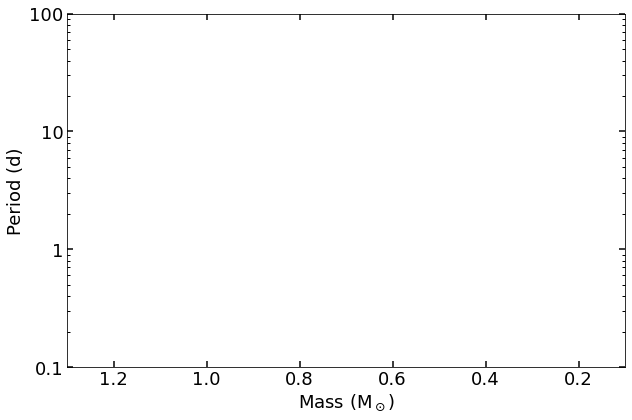

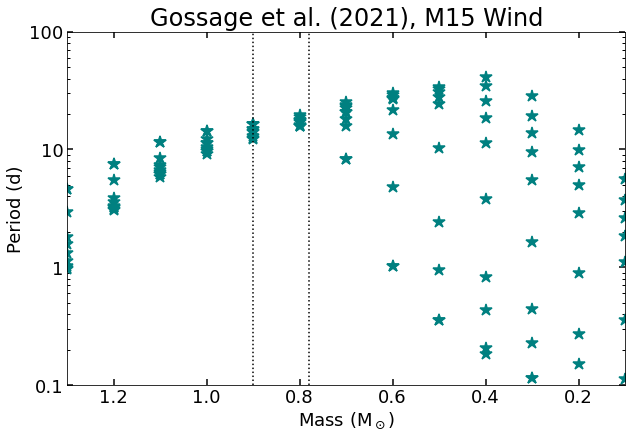

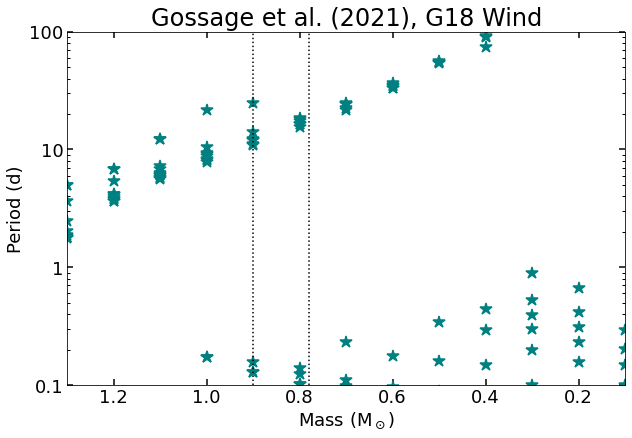

In [217]:
desired_age = 790


# plt.savefig(f"plots/periodmass_all_clean{clean_limit}_{model_f}.png")
# plt.close("all")


# plt.savefig(f"plots/periodmass_all_clean{clean_limit}_{model_f}.png")
# plt.close("all")
